<a href="https://colab.research.google.com/github/priyanshueeeee/Metron-LSTM/blob/main/Backtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Path to your file in Google Drive
file_path = '/content/drive/MyDrive/Dataset.csv'

# Read the CSV file
df = pd.read_csv(file_path)


Mounted at /content/drive


In [ ]:
df.head()
df.info()
data_wo_dates = df.iloc[:, 1:].values
data_wo_dates
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2042 non-null   object 
 1   CDX.NA.HY  2042 non-null   float64
 2   CDX.NA.IG  2042 non-null   float64
 3   SPOT       2042 non-null   float64
 4   VALUE      2042 non-null   float64
 5   Vol        2042 non-null   float64
 6   EQU        2042 non-null   float64
dtypes: float64(6), object(1)
memory usage: 111.8+ KB


In [ ]:
df.head()

,Date,CDX.NA.HY,CDX.NA.IG,SPOT,VALUE,Vol,EQU
0,01/17/2020,109.630,44.235,1.6195,1.657563,12.10,3329.62
1,01/16/2020,109.599,44.176,1.6247,1.656338,12.32,3316.81
2,01/15/2020,109.515,44.909,1.5985,1.639625,12.42,3289.29
3,01/14/2020,109.539,44.897,1.6199,1.660338,12.39,3283.15
4,01/13/2020,109.651,44.350,1.6495,1.682400,12.32,3288.13


In [ ]:
import numpy as np

def split_dataset(dataset):
    """
    Splits the dataset into X (all columns except the first) and Y (the first column).

    Args:
        dataset: The input dataset (NumPy array or list).

    Returns:
        X: The features (all columns except the first).
        Y: The target variable (the first column).
    """
    X = dataset[:, 1:]
    Y = dataset[:, 0]
    return X, Y

In [ ]:
import numpy as np

def create_dataset(X, Y, look_back=1, horizon=1):
    """
    Creates a dataset for time series forecasting with lookback and horizon.

    Args:
        X: The input features (already split).
        Y: The target variable (already split).
        look_back: The number of past time steps to consider.
        horizon: The number of future time steps to predict.

    Returns:
        X_dataset: The input dataset for forecasting.
        Y_dataset: The target dataset for forecasting.
    """
    X_dataset, Y_dataset = [], []
    for i in range(len(X) - look_back - horizon + 1):
        X_dataset.append(X[i:(i + look_back)])
        Y_dataset.append(Y[i + look_back: i + look_back + horizon])
    return np.array(X_dataset), np.array(Y_dataset)

In [ ]:
X, Y = split_dataset(data_wo_dates)
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (2042, 5)
Y shape: (2042,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X.reshape(X.shape[0], -1))
Y_scaled = scaler_Y.fit_transform(Y.reshape(Y.shape[0], -1))
print(X_scaled.shape)
print(Y_scaled.shape)
X_scaled = X_scaled.reshape(X.shape)
Y_scaled = Y_scaled.reshape(Y.shape)

print("X_train_scaled shape:", X_scaled.shape)
print("Y_train_scaled shape:", Y_scaled.shape)

(2042, 5)
(2042, 1)
X_train_scaled shape: (2042, 5)
Y_train_scaled shape: (2042,)


In [ ]:
look_back = 10
horizon = 5

X_dataset, Y_dataset = create_dataset(X_scaled, Y_scaled, look_back, horizon)

In [ ]:
split_index = int(len(X_dataset) * 0.7)
X_train = X_dataset[:split_index]
X_test = X_dataset[split_index:]
Y_train = Y_dataset[:split_index]
Y_test = Y_dataset[split_index:]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1419, 10, 5)
X_test shape: (609, 10, 5)
Y_train shape: (1419, 5)
Y_test shape: (609, 5)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1419, 10, 5)
(609, 10, 5)
(1419, 5)
(609, 5)


In [ ]:
print(X_dataset)

[[[0.00197172 0.4224794  0.41593938 0.09367089 1.        ]
  [0.00140425 0.42451942 0.41543179 0.10063291 0.99409936]
  [0.00845436 0.41424088 0.4085068  0.10379747 0.98142288]
  ...
  [0.01211888 0.43950569 0.42960807 0.13639241 0.96472973]
  [0.02726748 0.41961554 0.41048019 0.1471519  0.95741956]
  [0.02255458 0.41710475 0.41019014 0.14905063 0.96161128]]

 [[0.00140425 0.42451942 0.41543179 0.10063291 0.99409936]
  [0.00845436 0.41424088 0.4085068  0.10379747 0.98142288]
  [0.00833894 0.42263633 0.41708923 0.1028481  0.97859462]
  ...
  [0.02726748 0.41961554 0.41048019 0.1471519  0.95741956]
  [0.02255458 0.41710475 0.41019014 0.14905063 0.96161128]
  [0.01868808 0.41074931 0.401789   0.15443038 0.9563463 ]]

 [[0.00845436 0.41424088 0.4085068  0.10379747 0.98142288]
  [0.00833894 0.42263633 0.41708923 0.1028481  0.97859462]
  [0.00307781 0.43424872 0.42623104 0.10063291 0.98088855]
  ...
  [0.02255458 0.41710475 0.41019014 0.14905063 0.96161128]
  [0.01868808 0.41074931 0.401789 

In [ ]:
print(X_train)

[[[0.00197172 0.4224794  0.41593938 0.09367089 1.        ]
  [0.00140425 0.42451942 0.41543179 0.10063291 0.99409936]
  [0.00845436 0.41424088 0.4085068  0.10379747 0.98142288]
  ...
  [0.01211888 0.43950569 0.42960807 0.13639241 0.96472973]
  [0.02726748 0.41961554 0.41048019 0.1471519  0.95741956]
  [0.02255458 0.41710475 0.41019014 0.14905063 0.96161128]]

 [[0.00140425 0.42451942 0.41543179 0.10063291 0.99409936]
  [0.00845436 0.41424088 0.4085068  0.10379747 0.98142288]
  [0.00833894 0.42263633 0.41708923 0.1028481  0.97859462]
  ...
  [0.02726748 0.41961554 0.41048019 0.1471519  0.95741956]
  [0.02255458 0.41710475 0.41019014 0.14905063 0.96161128]
  [0.01868808 0.41074931 0.401789   0.15443038 0.9563463 ]]

 [[0.00845436 0.41424088 0.4085068  0.10379747 0.98142288]
  [0.00833894 0.42263633 0.41708923 0.1028481  0.97859462]
  [0.00307781 0.43424872 0.42623104 0.10063291 0.98088855]
  ...
  [0.02255458 0.41710475 0.41019014 0.14905063 0.96161128]
  [0.01868808 0.41074931 0.401789 

In [ ]:
print(Y_test)

[[0.87328798 0.8675141  0.87060245 0.86339629 0.87592874]
 [0.8675141  0.87060245 0.86339629 0.87592874 0.87762958]
 [0.87060245 0.86339629 0.87592874 0.87762958 0.88470146]
 ...
 [0.05232298 0.06901799 0.11086742 0.10867425 0.13432101]
 [0.06901799 0.11086742 0.10867425 0.13432101 0.15952019]
 [0.11086742 0.10867425 0.13432101 0.15952019 0.17496196]]


In [ ]:
print(X_train[0][0])

[0.00197172 0.4224794  0.41593938 0.09367089 1.        ]


In [ ]:
print(X_train.shape[1])

10


In [ ]:
print(Y_train[0][0])

0.9868856861516431


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1], 5)))
model.add(layers.LSTM(units=300, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(units=300))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=horizon))

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam


initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=125,
    decay_rate=0.01,
    staircase=True
)
optimizer = Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=10, batch_size=32)
predictions = model.predict(X_test)

Epoch 1/10
45/45 [==============================] - 5s 40ms/step - loss: 0.0738
Epoch 2/10
45/45 [==============================] - 2s 40ms/step - loss: 0.0111
Epoch 3/10
45/45 [==============================] - 2s 40ms/step - loss: 0.0059
Epoch 4/10
45/45 [==============================] - 2s 40ms/step - loss: 0.0049
Epoch 5/10
45/45 [==============================] - 2s 41ms/step - loss: 0.0049
Epoch 6/10
45/45 [==============================] - 2s 41ms/step - loss: 0.0047
Epoch 7/10
45/45 [==============================] - 2s 42ms/step - loss: 0.0048
Epoch 8/10
45/45 [==============================] - 2s 41ms/step - loss: 0.0049
Epoch 9/10
45/45 [==============================] - 2s 40ms/step - loss: 0.0048
Epoch 10/10
20/20 [==============================] - 1s 17ms/step


In [ ]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test, predictions)
print(rmse)

0.18818784294502805


In [ ]:
print(len(predictions))

609


In [ ]:
print(predictions)

[[ 0.8386034   0.8453881   0.8353373   0.834378    0.83499444]
 [ 0.83962035  0.8465336   0.8364329   0.8354683   0.83612317]
 [ 0.839026    0.84608173  0.83594316  0.8349176   0.83570397]
 ...
 [ 0.04372179  0.02503125  0.07670161  0.05452223  0.06482679]
 [ 0.01873735 -0.00213179  0.05304185  0.02977058  0.04015291]
 [-0.0094621  -0.03245306  0.02608058  0.00172416  0.01228912]]


In [ ]:
print(predictions.shape)

(609, 5)


In [ ]:
predictions_reshaped = predictions.reshape(predictions.shape[0], -1)
original_predictions = scaler_Y.inverse_transform(predictions_reshaped)
original_predictions = original_predictions.reshape(predictions.shape)
print("Original predictions shape:", original_predictions.shape)

Original predictions shape: (609, 5)


In [ ]:
print(original_predictions)

[[106.25608  106.40766  106.183105 106.16167  106.175446]
 [106.27879  106.43325  106.20759  106.186035 106.20066 ]
 [106.26552  106.42316  106.19665  106.17373  106.1913  ]
 ...
 [ 88.49683   88.07925   89.233665  88.73814   88.96836 ]
 [ 87.93863   87.472374  88.70506   88.185135  88.4171  ]
 [ 87.3086    86.79494   88.10269   87.55852   87.79456 ]]


In [ ]:
Y_test_reshaped = Y_test.reshape(Y_test.shape[0], -1)
Y_test_vals = scaler_Y.inverse_transform(Y_test_reshaped)
Y_test_vals = Y_test_vals.reshape(Y_test.shape)
print(Y_test_vals)

[[107.031 106.902 106.971 106.81  107.09 ]
 [106.902 106.971 106.81  107.09  107.128]
 [106.971 106.81  107.09  107.128 107.286]
 ...
 [ 88.689  89.062  89.997  89.948  90.521]
 [ 89.062  89.997  89.948  90.521  91.084]
 [ 89.997  89.948  90.521  91.084  91.429]]


In [ ]:
from sklearn.metrics import root_mean_squared_error
rmse1= root_mean_squared_error(Y_test_vals, original_predictions)
print(rmse1)

4.204492826213889


In [ ]:
## backtesting from here

In [ ]:
predicted_spreads = model.predict(X_dataset)

64/64 [==============================] - 1s 17ms/step


In [ ]:
predicted_spreads_reshaped = predicted_spreads.reshape(predicted_spreads.shape[0], -1)
predicted_spreads = scaler_Y.inverse_transform(predicted_spreads_reshaped)

In [ ]:
print(predicted_spreads)

[[109.23531  108.931335 109.11548  109.112946 108.92952 ]
 [109.2036   108.90185  109.086235 109.084724 108.901825]
 [109.17856  108.882256 109.061295 109.06041  108.88124 ]
 ...
 [ 88.49683   88.07925   89.233665  88.73814   88.96836 ]
 [ 87.93863   87.472374  88.70506   88.185135  88.4171  ]
 [ 87.3086    86.79494   88.10269   87.55852   87.79456 ]]


In [ ]:
actual_spreads = Y_scaled.ravel()
actual_spreads = scaler_Y.inverse_transform(actual_spreads.reshape(-1, 1))

In [ ]:
print(actual_spreads)

[[109.63 ]
 [109.599]
 [109.515]
 ...
 [ 90.521]
 [ 91.084]
 [ 91.429]]


In [ ]:
class Backtesting:
    def __init__(self, actual_spreads, predicted_spreads, horizon, posthresh, negthresh):
        """
        Initializes the Backtesting class.

        Args:
            actual_spreads (list): List of actual spreads.
            predicted_spreads (list): List of predicted spreads.
            horizon (int): Time horizon for predictions.
            posthresh (float): Positive threshold for generating "Long" signals.
            negthresh (float): Negative threshold for generating "Short" signals.

        """
        self.actual_spreads = actual_spreads
        self.predicted_spreads = predicted_spreads
        self.horizon = horizon
        self.posthresh = posthresh
        self.negthresh = negthresh

    def generate_signals(self):
        """
        Generates trading signals based on predicted and actual spreads.

        Returns:
            list: List of trading signals ("Long", "Short", or ".").
        """
        signals = []
        for i in range(len(self.predicted_spreads)):
            if self.predicted_spreads[i-1][self.horizon-1]  > self.actual_spreads[i-1] + self.posthresh:
                signals.append("Long")
            elif self.predicted_spreads[i-1][self.horizon-1] < self.actual_spreads[i-1] + self.negthresh:
                signals.append("Short")
            else:
                signals.append(".")
        return signals

    def calculate_pnl(self, signals):
        """
        Calculates the profit/loss for each trade and the total profit.

        Args:
            signals (list): List of trading signals.

        Returns:
            tuple: Tuple containing the list of profit/loss values and the total profit.
        """
        pnl = []
        for sgn, index in zip(signals, range(len(signals))):
            if sgn == "Long":
                pnl.append(self.actual_spreads[index + self.horizon] - self.actual_spreads[index])
            elif sgn == "Short":
                pnl.append(self.actual_spreads[index] - self.actual_spreads[index + self.horizon])
        total_pnl = sum(pnl)
        return pnl, total_pnl

    def simulate_portfolio(self, signals, starting_balance=1000000, portfolio_size=0.1,extra_charges=0.0005):
        """
        Simulates a trading strategy with a starting balance.

        Args:
            signals (list): List of trading signals.
            starting_balance (float): Starting balance for the portfolio.
            portfolio_size (float): Percentage of portfolio to allocate per trade.
            extra_charges (float): Extra charges as a percentage of allocated amount.

        Returns:
            list: List of portfolio balances at each step.
        """
        balance = starting_balance
        portfolio_history = []
        for sgn, index in zip(signals, range(len(signals))):
            if sgn == 'Long':
                allocation = portfolio_size * balance
                balance -= allocation
                balance += allocation * (self.actual_spreads[index + self.horizon] / self.actual_spreads[index])
                balance -= extra_charges * allocation
            elif sgn == 'Short':
                allocation = portfolio_size * balance
                balance -= allocation
                balance += allocation * (self.actual_spreads[index] / self.actual_spreads[index + self.horizon])
                balance -= extra_charges * allocation
            portfolio_history.append(balance)
        return portfolio_history

In [ ]:
class PerformanceEvalutions:
    def __init__(self, portfolio_returns, portfolio_history):
        """
        Initializes the PerformanceEvalutions class.

        Args:
            portfolio_returns (list): List of portfolio returns.
            portfolio_history (list): List of portfolio balances.
        """
        self.portfolio_returns = portfolio_returns
        self.portfolio_history = portfolio_history
    def calc_sharpe_ratio(self, risk_free_rate=0.01):
      """
        Calculates the Sharpe ratio of the portfolio.

        Args:
            risk_free_rate (float): Risk-free rate (default: 0.01).

        Returns:
            float: Sharpe ratio of the portfolio.
        """
      average_return = np.mean(self.portfolio_returns)
      std_dev = np.std(self.portfolio_returns)
      sharpe_ratio = (average_return - risk_free_rate) / std_dev
      return sharpe_ratio
    def max_drawdown(self):
      """
        Calculates the maximum drawdown of the portfolio.

        Returns:
            float: Maximum drawdown of the portfolio.
        """

      peak = max(self.portfolio_history)
      drawdown_list = (self.portfolio_history.copy() - peak)/peak
      max_drawdown = min(drawdown_list)
      return max_drawdown , drawdown_list
    def cummulative_returns (self):
      """
        Calculates the cumulative returns of the portfolio.

        Returns:
            float: Cumulative returns of the portfolio.
        """
      return (self.portfolio_history[-1] / self.portfolio_history[0] - 1)*100

    def profit_loss_ratio(self):
        """
        Calculates the profit-loss ratio of the portfolio.

        Returns:
            float: Profit-loss ratio of the portfolio.
        """
        portfolio_returns_np = np.array(self.portfolio_returns)
        positive_returns = np.sum(portfolio_returns_np > 0)
        negative_returns = np.sum(portfolio_returns_np < 0)

        if negative_returns == 0:
            return float('inf')  # Avoid division by zero
        else:
            return positive_returns / negative_returns
## risk - return tradeoff metric remaining

In [ ]:
backtest = Backtesting(actual_spreads,predicted_spreads,5,1,-1)

In [ ]:
backtest_signal = backtest.generate_signals()
pn1 , total_pn1 = backtest.calculate_pnl(backtest_signal)

In [ ]:
backtest_signal

['Short',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 'Long',
 'Long',
 'Long',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 'Long',
 '.',
 '.',
 '.',
 '.',
 '.',
 'Long',
 'Long',
 '.',
 'Long',
 '.',
 '.',
 '.',
 '.',
 'Long',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 'Short',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 'Long',
 'Long',
 '

In [ ]:
pn1

[array([-0.033]),
 array([0.484]),
 array([0.47]),
 array([0.337]),
 array([-1.106]),
 array([0.888]),
 array([-0.219]),
 array([0.646]),
 array([1.297]),
 array([1.223]),
 array([1.265]),
 array([1.08]),
 array([0.603]),
 array([0.406]),
 array([0.556]),
 array([1.211]),
 array([1.228]),
 array([-1.051]),
 array([0.959]),
 array([2.196]),
 array([2.336]),
 array([2.404]),
 array([1.435]),
 array([0.316]),
 array([0.142]),
 array([-0.207]),
 array([1.413]),
 array([1.576]),
 array([1.076]),
 array([1.058]),
 array([0.727]),
 array([1.443]),
 array([1.85]),
 array([2.053]),
 array([2.003]),
 array([1.545]),
 array([1.053]),
 array([0.182]),
 array([0.685]),
 array([0.871]),
 array([0.2]),
 array([0.489]),
 array([-0.087]),
 array([0.255]),
 array([-0.047]),
 array([0.278]),
 array([1.573]),
 array([2.086]),
 array([1.534]),
 array([1.011]),
 array([1.773]),
 array([1.203]),
 array([0.412]),
 array([0.547]),
 array([0.186]),
 array([-0.03]),
 array([-0.266]),
 array([-0.249]),
 array([0.

In [ ]:
total_pn1

array([281.845])

In [ ]:
portfolio_history = backtest.simulate_portfolio(backtest_signal)
print(portfolio_history)

[array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), array([1268198.14420545]), 

In [ ]:
evaluation = PerformanceEvalutions(pn1,portfolio_history)

In [ ]:
sharpe_ratio = evaluation.calc_sharpe_ratio()
print(sharpe_ratio)

0.3047954664114983


In [ ]:
max_drawdown, drawdown_list = evaluation.max_drawdown()
print(max_drawdown)

[0.]


In [ ]:
cumulative_returns = evaluation.cummulative_returns()
print(cumulative_returns)

[0.]


In [ ]:
profit_loss_ratio = evaluation.profit_loss_ratio()
print(profit_loss_ratio)

1.7531645569620253


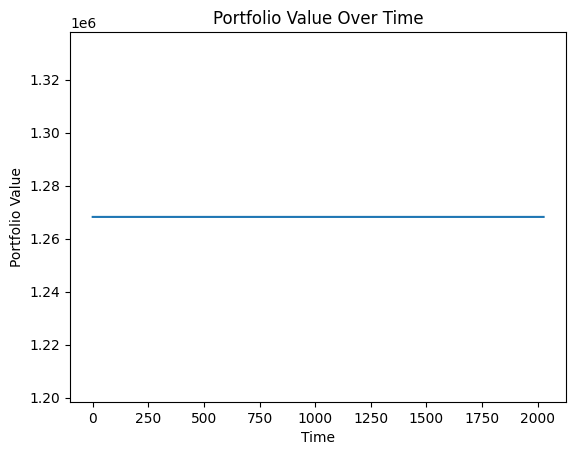

In [ ]:
import matplotlib.pyplot as plt

plt.plot(portfolio_history)
plt.title("Portfolio Value Over Time")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.show()

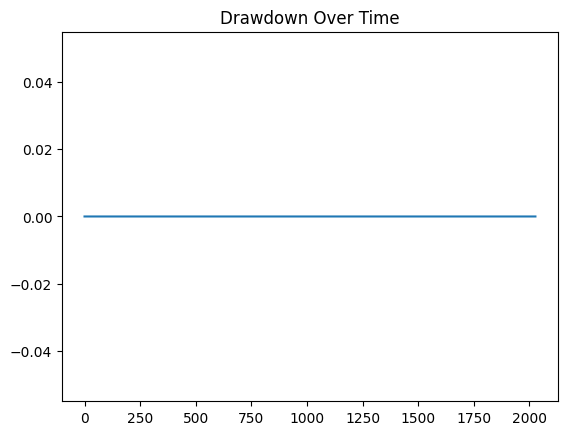

In [ ]:
plt.plot(drawdown_list)
plt.title("Drawdown Over Time")
plt.show()

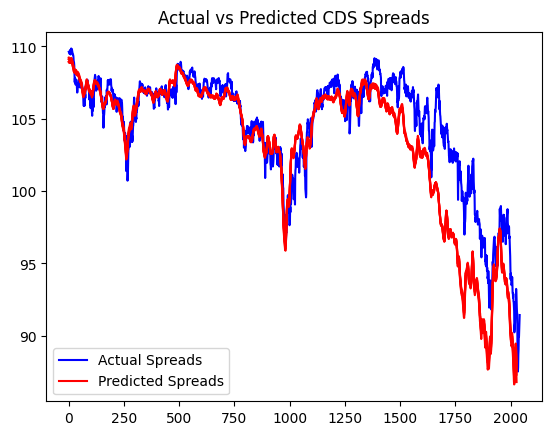

In [ ]:
plt.plot(actual_spreads, color="Blue")
plt.plot(predicted_spreads, color="red")
plt.legend(labels=["Actual Spreads", "Predicted Spreads"])
plt.title("Actual vs Predicted CDS Spreads")
plt.show()

In [ ]:
#comparison with other models left

In [ ]:
# from tensorflow.keras.layers import GRU, Dense
# from tensorflow.keras.layers import TimeDistributed
# from sklearn.svm import SVC

# # Create a GRU model
# model_gru = tf.keras.Sequential([GRU(units=64, input_shape=(X_train.shape[1], X_train.shape[2])),Dense(units=1, activation='sigmoid')])

# model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model_gru = tf.keras.Sequential([
#     GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
#     TimeDistributed(Dense(units=1, activation='sigmoid'))
# ])
# model_gru.fit(X_train,Y_train, epochs=10,batch_size=32)

In [ ]:
from tensorflow.keras.layers import GRU, Dense, TimeDistributed
from tensorflow.keras.models import Sequential  # Import Sequential for model creation

# Create the GRU model
gru_model = tf.keras.Sequential([
    GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),TimeDistributed(Dense(units=5, activation='sigmoid'))
])
# Compile the model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
X_train.shape

(1419, 10, 5)

In [ ]:
Y_train.shape

(1419, 5)

In [ ]:
gru_model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_28 (GRU)                (None, 10, 64)            13632     
                                                                 
 time_distributed_17 (TimeD  (None, 10, 5)             325       
 istributed)                                                     
                                                                 
Total params: 13957 (54.52 KB)
Trainable params: 13957 (54.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
gru_model.fit(X_train, Y_train, epochs=10, batch_size=64)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5830, in binary_crossentropy
        bce = target * tf.math.log(output + epsilon())

    ValueError: Dimensions must be equal, but are 5 and 10 for '{{node binary_crossentropy/mul}} = Mul[T=DT_FLOAT](IteratorGetNext:1, binary_crossentropy/Log)' with input shapes: [?,5], [?,10,10].


In [ ]:
X_train.shape

(1419, 10, 5)

In [ ]:
Y_train.shape

(1419, 5)

In [ ]:
gru_predictions = model_gru.predict(X_dataset)
gru_predictions = gru_predictions.reshape(gru_predictions.shape[0], -1)
gru_predictions = scaler_Y.inverse_transform(gru_predictions)
gru_predictions = gru_predictions.reshape(gru_predictions.shape)
print(gru_predictions)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[ 99.59133  100.10621  100.38339  ... 100.71975  100.711494 100.70787 ]
 [ 99.58964  100.09322  100.381805 ... 100.70565  100.70475  100.69584 ]
 [ 99.57653  100.09141  100.39112  ... 100.698845 100.69269  100.71475 ]
 ...
 [ 98.8202    98.948425  99.03028  ...  99.0901    99.086075  99.07633 ]
 [ 98.83211   98.94881   99.01828  ...  99.08358   99.07503   99.07865 ]
 [ 98.82579   98.933624  99.01874  ...  99.07257   99.077354  99.08588 ]]


In [ ]:
gru_predictions.shape

(2028, 10)

In [ ]:
gru_backtest = Backtesting(actual_spreads,gru_predictions,5,1,-1)
gru_backtest_signal = gru_backtest.generate_signals()
gru_pn1 , gru_total_pn1 = gru_backtest.calculate_pnl(gru_backtest_signal)
gru_portfolio_history = gru_backtest.simulate_portfolio(gru_backtest_signal)

In [ ]:
print(gru_pn1)

[array([0.033]), array([-0.161]), array([-0.079]), array([0.092]), array([0.044]), array([0.094]), array([-0.102]), array([-0.046]), array([-0.252]), array([-0.199]), array([-0.162]), array([0.251]), array([0.096]), array([0.18]), array([0.387]), array([0.312]), array([0.308]), array([0.505]), array([0.559]), array([0.547]), array([0.765]), array([1.226]), array([1.513]), array([1.164]), array([1.312]), array([1.056]), array([0.716]), array([0.066]), array([0.136]), array([-0.156]), array([-0.041]), array([-0.099]), array([0.346]), array([0.848]), array([0.878]), array([0.606]), array([0.149]), array([-0.285]), array([-0.424]), array([-0.484]), array([-0.47]), array([-0.337]), array([-0.341]), array([-0.403]), array([-0.413]), array([-0.297]), array([0.105]), array([0.583]), array([0.249]), array([0.31]), array([0.264]), array([0.06]), array([-0.234]), array([-0.029]), array([0.107]), array([0.101]), array([0.246]), array([0.232]), array([0.323]), array([0.267]), array([0.595]), array(

In [ ]:
print(gru_total_pn1)

[111.979]


In [ ]:
print(gru_backtest_signal)

['Long', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', 'Short', '

In [ ]:
gru_evaluation = PerformanceEvalutions(gru_pn1,gru_portfolio_history)

In [ ]:
gru_sharpe_ratio = gru_evaluation.calc_sharpe_ratio()
print(gru_sharpe_ratio)

0.05853932821966538


In [ ]:
gru_max_drawdown, gru_drawdown_list = gru_evaluation.max_drawdown()
print(gru_max_drawdown)

-0.07147158973254471


In [ ]:
gru_cumulative_returns = gru_evaluation.cummulative_returns()
print(gru_cumulative_returns)

1.7391041133949292


In [ ]:
# Create an SVM model
model_svm = SVC()
model_svm.fit(X_train[:][][], Y_train)

ValueError: Found array with dim 3. SVC expected <= 2.